In [14]:
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

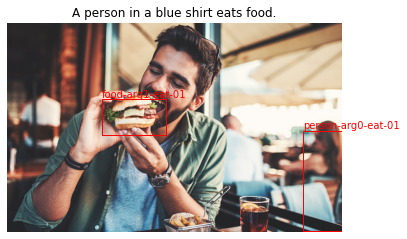

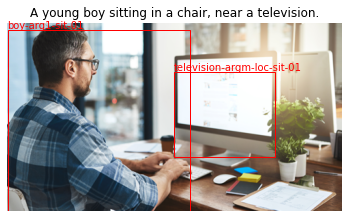

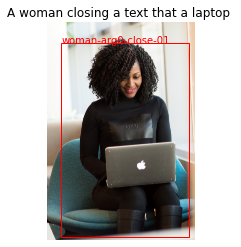

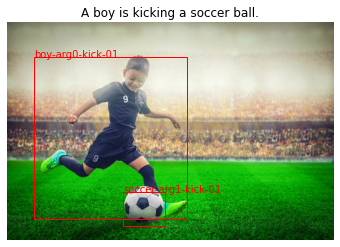

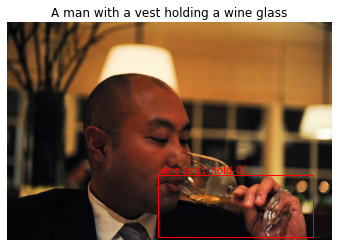

In [36]:
output_map_file = "word_to_pos.json"

# Opening JSON file
f = open(output_map_file)
 
# returns JSON object as
# a dictionary
word_to_obj_pos = json.load(f)


def label_box(image_num, title):
    image_num = str(image_num)
    
    image = "test_images/" + image_num + ".jpg"
    
    im = Image.open(image)

    # Display the image
    plt.imshow(im)

    # Get the current reference
    ax = plt.gca()
    
    for word_label in word_to_obj_pos[image_num]:
        output = word_to_obj_pos[image_num][word_label]
        caption_label = f"{word_label}-{output[0]}-{output[1]}"
        obj_position = output[2]
        
        x_y = (obj_position[0], obj_position[1])
        width = obj_position[2] - obj_position[0]
        height = obj_position[3] - obj_position[1]
        x_y_text = (obj_position[0], obj_position[1]-3)
        rect = Rectangle(x_y,width,height,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        ax.text(x_y_text[0],x_y_text[1], caption_label, color="r" )
    plt.title(title)
    plt.axis('off')
    plt.savefig(f"{image_num}-labeled.jpg")
    plt.show()
    
    
images_to_use = [2,3,7,10,12]

title_dict = {2 : "A person in a blue shirt eats food." , 3 : "A young boy sitting in a chair, near a television.", 7 : "A woman closing a text that a laptop ", 10 : "A boy is kicking a soccer ball.", 12 : "A man with a vest holding a wine glass"}

for img in images_to_use:
    label_box(img, title_dict[img])